# Advance DataBase Systems Project 
### --------------------------------------------------------------------------

# This project is focused on the data analysis and visualiation of a dataset on the Olympics games from the year 1896 to 2016.

### Jaimin Patel    -   110017550
### Soham Patel    -   110017511
### Parshwa Shah -   110021970

# --------------------------------------------------------------------------------------------------------------
    

# Including the Libraries that will be required for the data visualization 

In [1]:
# First of all we will include the libraries that are needed to perform the data visualization

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import itertools
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud,STOPWORDS
import io
import base64
from mpl_toolkits.mplot3d import Axes3D
#from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
import os
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Importing datasets
## 1. Athlete Events Data
## 2. Regions Data
## 3. Host Country Data

In [2]:
#importing data files

data = pd.read_csv(r"C:\Users\jaimi\Downloads\120years\athlete_events.csv")
regions = pd.read_csv(r"C:\Users\jaimi\Downloads\120years\noc_regions.csv")
host    = pd.read_csv(r"C:\Users\jaimi\Downloads\120years\host.csv", encoding='windows-1252')

In [3]:
#Understanding and collecting the data from above data files.
data.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


# Joining the dataframes¶

In [7]:
merged=pd.merge(data,regions,on='NOC',how='left')
merged.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


#  Data Cleaning

# Q. Checking  coloumn wise missing values

In [8]:

print(data.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


In [9]:
"""according to above analysis, there are many null values in the columns like Age,Height, Weight and Medals.
In this case it is understood that not all the participants wins medals, thus we can replace those values with NW i.e.Not a Winner"""

data['Medal'].fillna('NW', inplace = True)

In [10]:
"""now let's check the results"""
print(data.isnull().sum())

ID            0
Name          0
Sex           0
Age        9474
Height    60171
Weight    62875
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64


# Removing missing value with their mean values

In [11]:
"""Now lets replace missing values in columns Age, Height and Weight values by their means."""
remaining_col = ['Age', 'Height', 'Weight']
for col in remaining_col:
    data[col] = data[col].fillna(np.mean(data[col]))
    data[col] = np.round(data[col],1)

In [12]:
"""now let's check the results"""
print(data.isnull().sum())

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


# Distribution of Gold Medals according to Age
===========================================================================

In [13]:
"""now, let's see the gold medalist athletes of olympics and put them into new data frame"""
goldMedals = merged[(merged.Medal == 'Gold')]
#goldMedals.head()

In [14]:
goldMedals=goldMedals[np.isfinite(goldMedals['Age'])]

Text(0.5, 1.0, 'Distribution of Gold Medals')

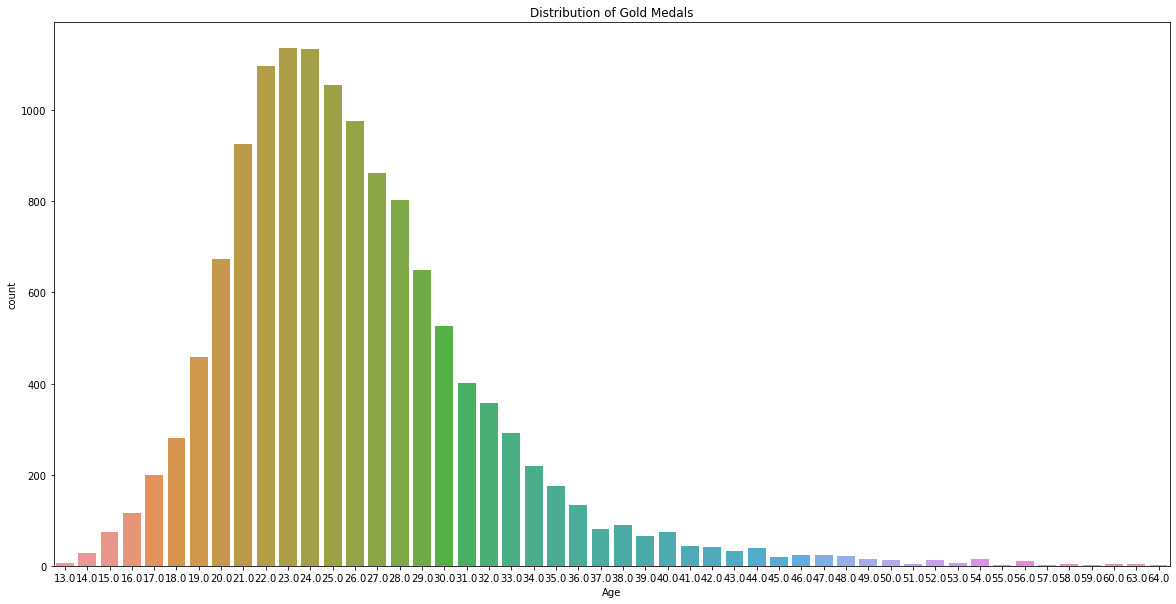

In [15]:
# """We can now create a countplot to see the result of our work:
#     --> this bar graph will project the age of athletes who won gold medals during various games of olympics.
# """
plt.figure(figsize=(20, 10))
plt.tight_layout()

sns.countplot(goldMedals['Age'])
plt.title('Distribution of Gold Medals')

# Distribution of Silver Medals according to Age

In [16]:
"""now, let's see the silver medalist athletes of olympics and put them into new data frame"""
silverMedals = merged[(merged.Medal == 'Silver')]
#silverMedals.head()

In [17]:
silverMedals=silverMedals[np.isfinite(silverMedals['Age'])]

Text(0.5, 1.0, 'Distribution of Silver Medals')

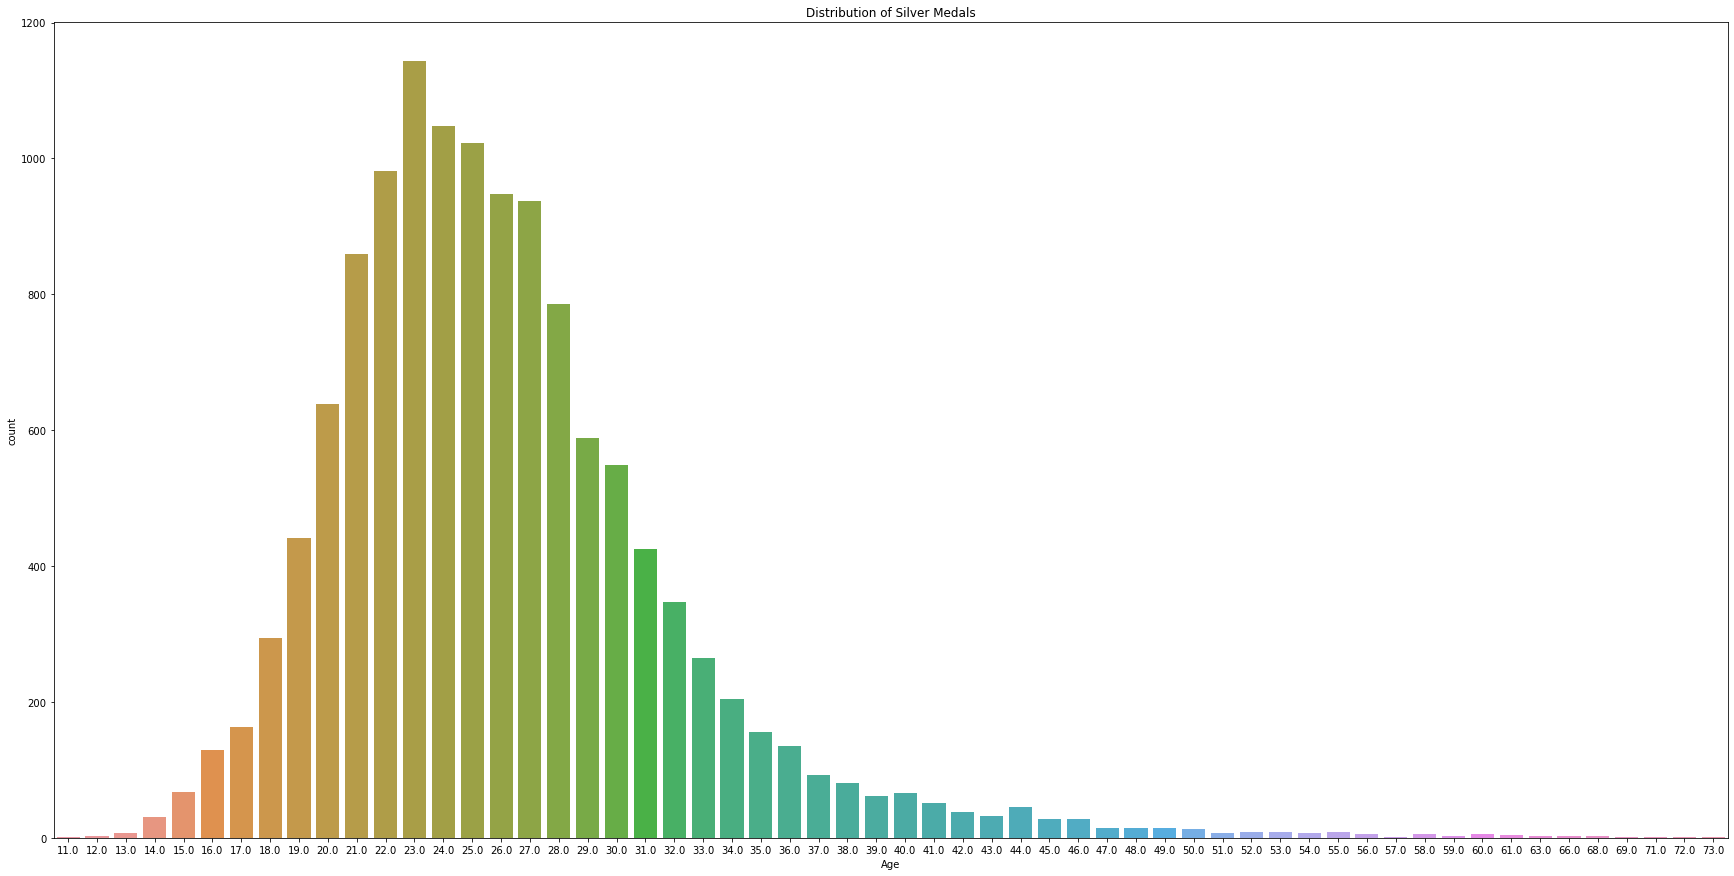

In [18]:
plt.figure(figsize=(30, 15))
plt.tight_layout()

sns.countplot(silverMedals['Age'])
plt.title('Distribution of Silver Medals')

# Distribution of Bronze Medals according to Age

In [19]:
"""now, let's see the gold medalist athletes of olympics and put them into new data frame"""
bronzeMedals = merged[(merged.Medal == 'Bronze')]
bronzeMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN
50,17,Paavo Johannes Aaltonen,M,32.0,175.0,64.0,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Gymnastics,Gymnastics Men's Team All-Around,Bronze,Finland,NaN


In [20]:
bronzeMedals=bronzeMedals[np.isfinite(bronzeMedals['Age'])]

Text(0.5, 1.0, 'Distribution of Bronze Medals')

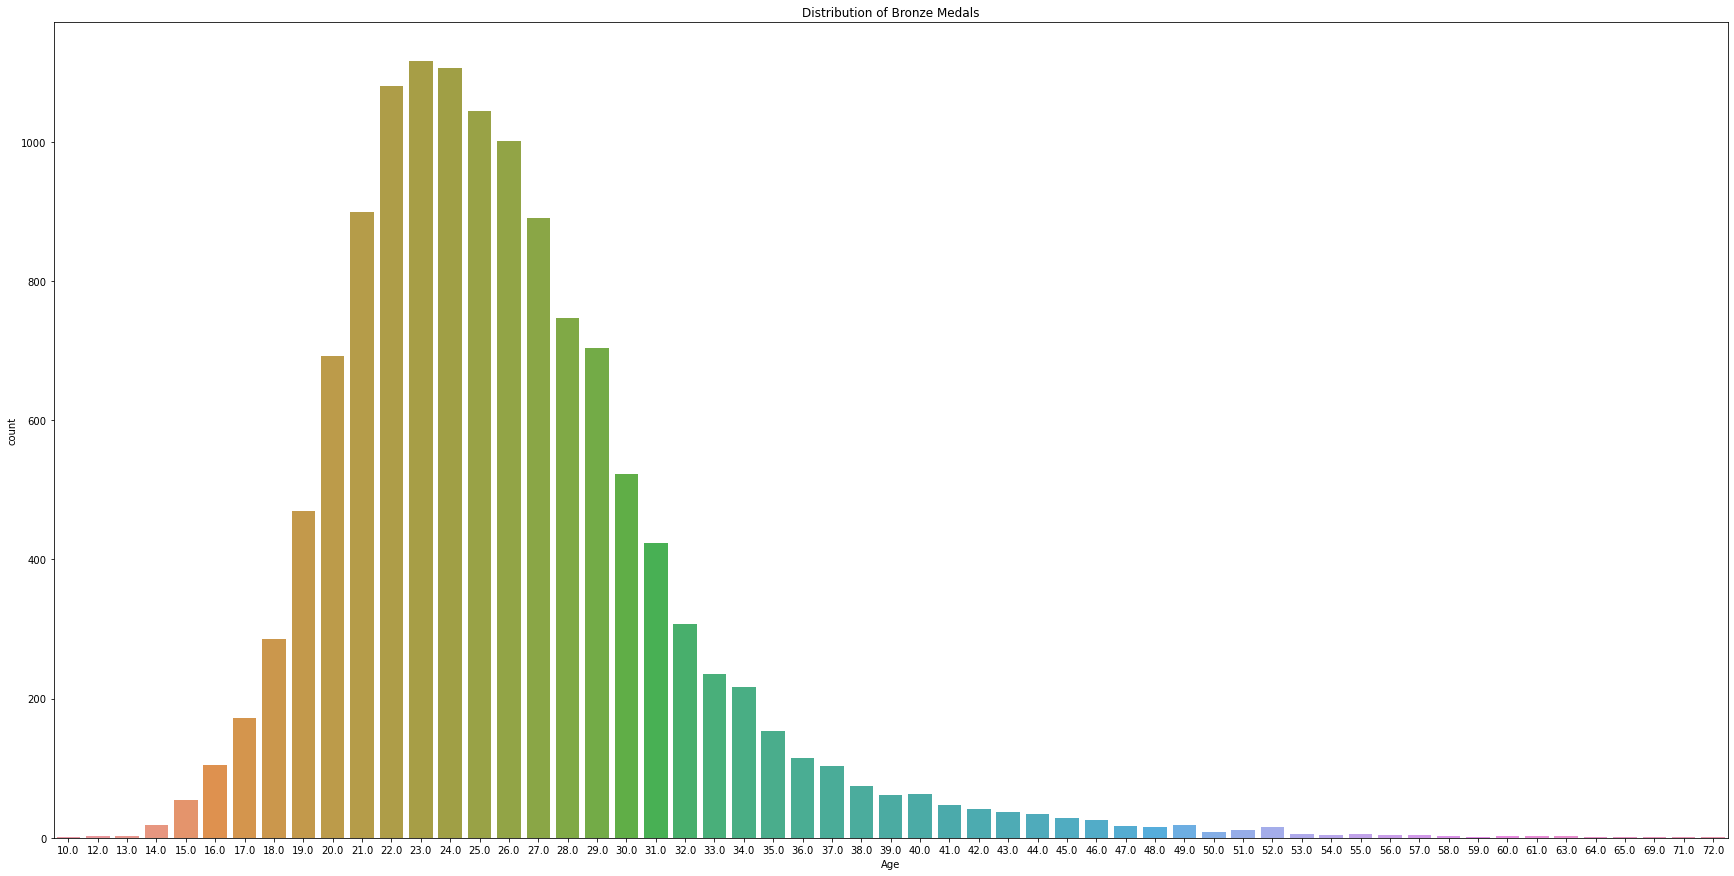

In [21]:
plt.figure(figsize=(30, 15))
plt.tight_layout()

sns.countplot(bronzeMedals['Age'])
plt.title('Distribution of Bronze Medals')

# Q. Concating the Gold, Silver and Bronze medalist into Winners datasets.

In [22]:
"""now let's combine all the winners into the single dataframe named winners."""
winners = pd.concat([goldMedals,silverMedals,bronzeMedals], axis=0)
winners.head() #with this you can see first few columns of winners dataframe
winners.tail() #with this you can see last few columns of winners dataframe

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
271032,135535,Claudia Antoinette Zwiers,F,22.0,181.0,78.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Judo,Judo Women's Middleweight,Bronze,Netherlands,NaN
271048,135545,Henk Jan Zwolle,M,27.0,197.0,93.0,Netherlands,NED,1992 Summer,1992,Summer,Barcelona,Rowing,Rowing Men's Double Sculls,Bronze,Netherlands,NaN
271080,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN
271082,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,Poland,NaN
271102,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,Russia,NaN


In [23]:
"""let's check if the new data frame have any null values"""
winners.isnull().sum()

ID            0
Name          0
Sex           0
Age           0
Height     8002
Weight     8626
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        9
notes     38510
dtype: int64

In [24]:
"""Now lets replace missing values in columns Age, Height and Weight values by their means."""
remaining_col = ['Age', 'Height', 'Weight']
for col in remaining_col:
    winners[col] = winners[col].fillna(np.mean(winners[col]))
    winners[col] = np.round(winners[col],1)

In [25]:
"""lets check the null values again(now it should show 0 in the columns Age,height and Weight)"""
winners.isnull().sum()

ID            0
Name          0
Sex           0
Age           0
Height        0
Weight        0
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        9
notes     38510
dtype: int64

In [26]:
# """now we can finally plot the winners and their age in form of graph."""
# plt.figure(figsize=(30, 20))
# plt.tight_layout()
# sns.countplot(winners['Age'])
# plt.title('Distribution of winners and their age.')

In [27]:
#According to the above graph it seems that most of the winners are of young age.
#let's count the nubers of winners who are of age 20 and below.

winners['ID'][winners['Year'] == 2000][winners['Age']<=20].count()

209

In [28]:
#Also, there are few winners which are senior citizens i.e. age more than 50
winners['ID'][winners['Age']>=50].count()

236

#  Q. What are the categoris in which atheletes above the age 50 won medals.?

In [29]:
#Now lets create dataframe which includes winners with their respective sports and have age more than 50 and make visualization ofthe same."""
old_winners = winners['Sport'][winners['Age'] > 50]

#  Athletes above the age of 50 and won the medals

Text(0.5, 1.0, 'Athletes above 50 and Won The medals.')

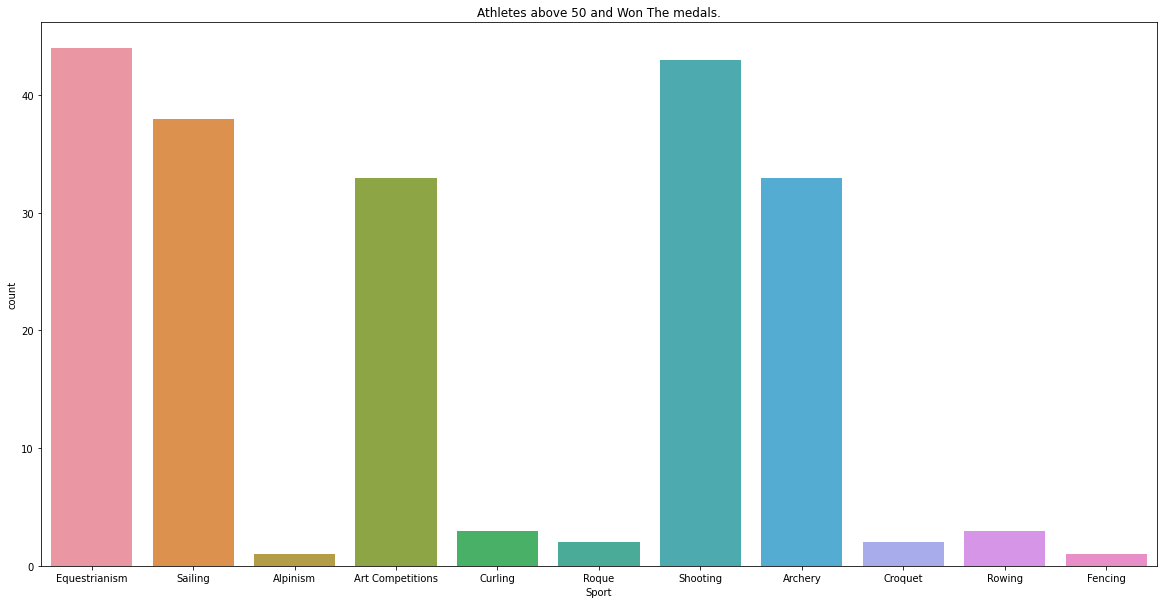

In [30]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(old_winners)
plt.title('Athletes above 50 and Won The medals.')

In [31]:
age60 = winners['ID'][winners['Age']>=60].count()

In [32]:
age60_winners = winners['Sport'][winners['Age'] > 60]

# Atheletes above the age 60 and won the medal

Text(0.5, 1.0, 'Athletes above 60 and Won The medals.')

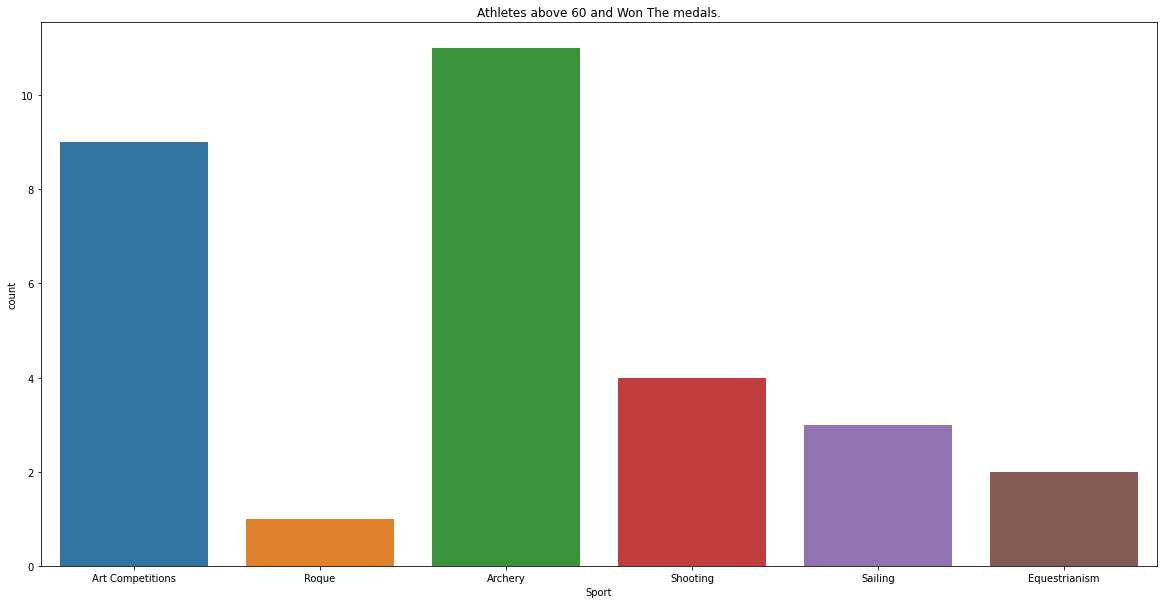

In [33]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(age60_winners)
plt.title('Athletes above 60 and Won The medals.')

In [34]:
age70 = winners['ID'][winners['Age']>=70].count()

In [35]:
age70_winners = winners['Sport'][winners['Age'] > 70]

# Atheletes above 70 and won the medal


Text(0.5, 1.0, 'Athletes above 70 and Won The medal.')

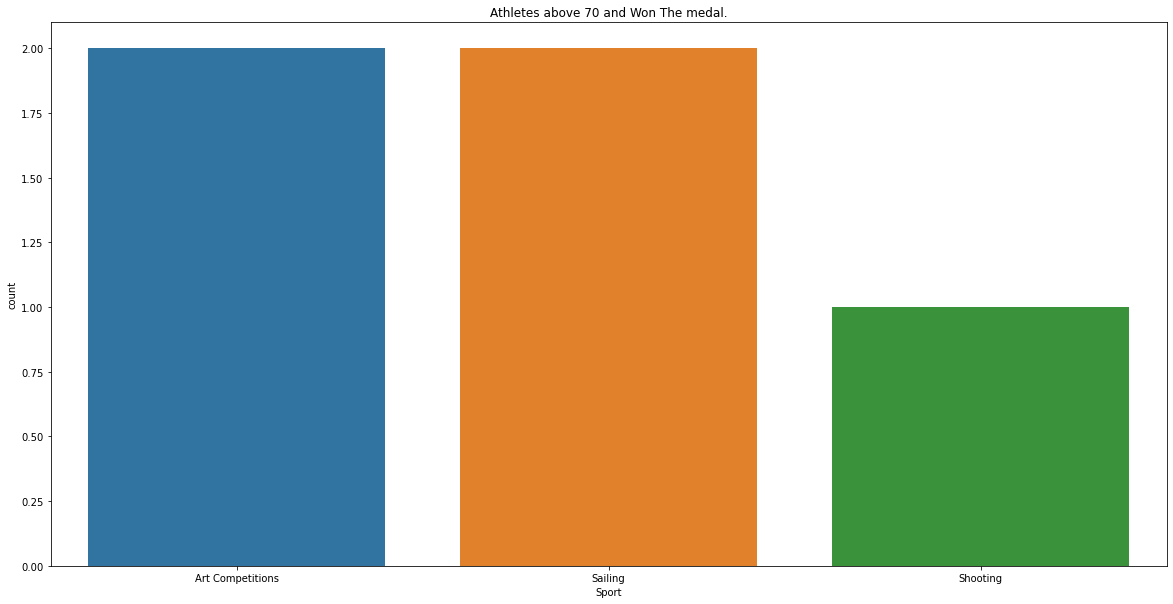

In [36]:
plt.figure(figsize=(20, 10))
plt.tight_layout()
sns.countplot(age70_winners)
plt.title('Athletes above 70 and Won The medal.')

# Q. Who was the oldest medalist in olympic?

In [37]:
winners['Age'].max()

73.0

In [38]:

winners[winners['Age']>=73]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
44584,22984,John (Herbert Crawford-) Copley (Williamson-),M,73.0,177.6,73.8,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",Silver,UK,NaN


#  Q. Who was the youngest medalist in Olympic ?

In [39]:
"""now let's find out who is the youngest winner and how many are thereof that age."""
winners['Age'].min()


10.0

In [40]:
winners[winners['Age']<=10]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
142882,71691,Dimitrios Loundras,M,10.0,177.6,73.8,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze,Greece,NaN


In [41]:
"""Now let's explore what is the mean age of all the winners"""
winners.describe()

,ID,Age,Height,Weight,Year
count,39051.000000,39051.000000,39051.000000,39051.000000,39051.000000
mean,69383.113237,25.925175,177.566418,73.781250,1975.102456
std,38845.066094,5.914026,9.714835,13.253723,32.996672
min,4.000000,10.000000,136.000000,28.000000,1896.000000
25%,36540.000000,22.000000,172.000000,66.000000,1956.000000
50%,68931.000000,25.000000,177.600000,73.800000,1984.000000
75%,103437.000000,29.000000,183.000000,80.000000,2002.000000
max,135563.000000,73.000000,223.000000,182.000000,2016.000000


# Q. Distribution of medal won according to gender

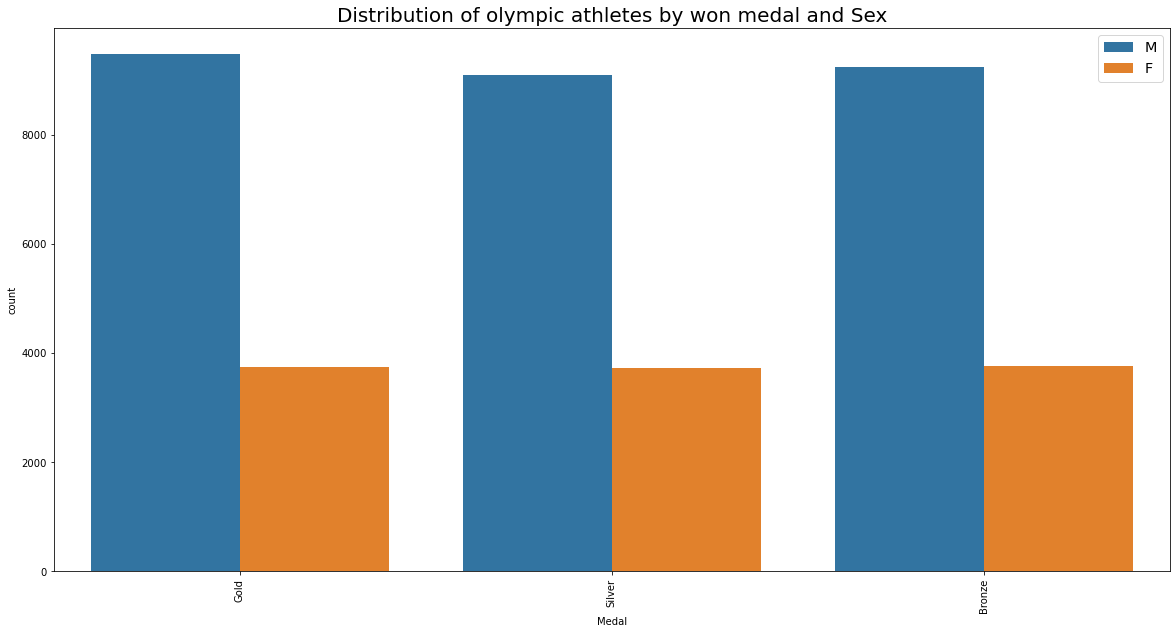

In [42]:
"""Now lets plot the winners by their gender and type of Medal won by the athletes."""

plt.figure(figsize=(20, 10))
sns.countplot(x= 'Medal', hue='Sex', data=winners )
plt.xticks(rotation = 90)
plt.legend(loc=1, fontsize='x-large')
plt.title('Distribution of olympic athletes by won medal and Sex', fontsize = 20)
plt.show()

In [43]:
# """height vs Weight of athletes and are they winners or not. if winners then what medals they won."""
# plt.figure(figsize=(20, 20))
# sns.scatterplot(x="Height", y="Weight", hue='Medal', data=data)
# plt.title('Height VS Weight of Olympics Athletes', fontsize=20)
# plt.show()

# women in olympics( Summer)

## Q. How the participation of women evolved in every olympic? 


In [44]:
womenInOlympics = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]


In [45]:
#womenInOlympics.head(10)

Text(0.5, 1.0, 'Women medals per edition of the Games')

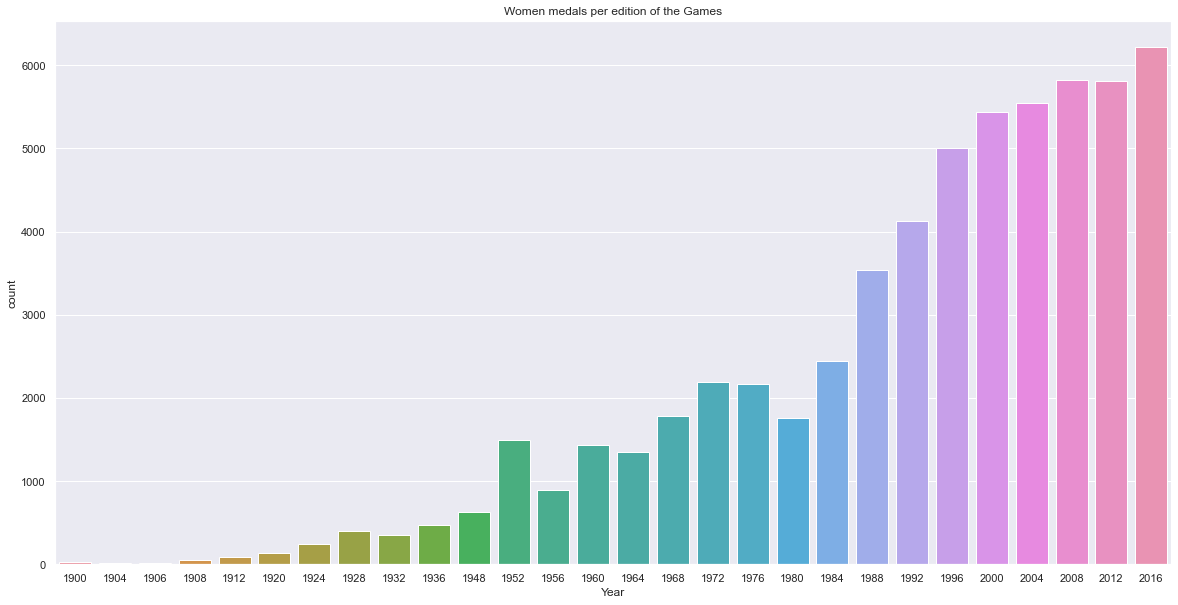

In [46]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=womenInOlympics)
plt.title('Women medals per edition of the Games')

In [47]:
#womenInOlympics.loc[womenInOlympics['Year'] == 1900].head(10)

#  Q. How many women participated in the year 1900, 1952,2000, 2016 ? 

In [48]:
womenInOlympics['ID'].loc[womenInOlympics['Year'] == 1900].count()

33

In [49]:
womenInOlympics['ID'].loc[womenInOlympics['Year'] == 1952].count()

1497

In [50]:
womenInOlympics['ID'].loc[womenInOlympics['Year'] == 2000].count()

5431

In [51]:
womenInOlympics['ID'].loc[womenInOlympics['Year'] == 2016].count()

6223

#  Medals per country 


# Q. What are the top countries that won highest medals ?

# Top 10 countries for gold medals

In [52]:
#goldMedals.region.value_counts().reset_index(name='Medal').head(10)

Text(0.5, 1.0, 'Gold Medals per Country')

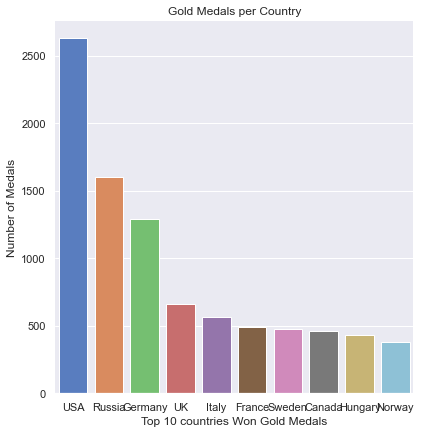

In [53]:
totalGoldMedals = goldMedals.region.value_counts().reset_index(name='Medal').head(10)
g = sns.catplot(x="index", y="Medal", data=totalGoldMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 10 countries Won Gold Medals")
g.set_ylabels("Number of Medals")
plt.title('Gold Medals per Country')

# Top 10 countries for Silver medals

In [54]:
#silverMedals.region.value_counts().reset_index(name='Medal').head(10)

Text(0.5, 1.0, 'Silver Medals per Country')

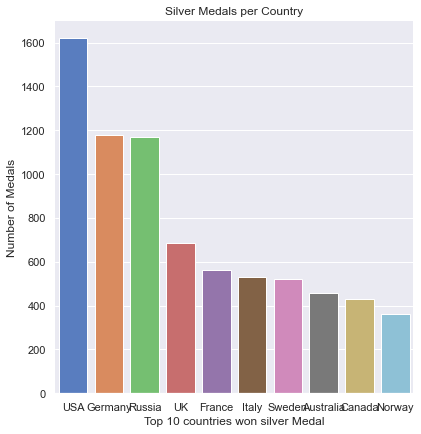

In [55]:
totalSilverMedals = silverMedals.region.value_counts().reset_index(name='Medal').head(10)
g = sns.catplot(x="index", y="Medal", data=totalSilverMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 10 countries won silver Medal")
g.set_ylabels("Number of Medals")
plt.title('Silver Medals per Country')

# Top 10 countries for Bronze medals

In [56]:
#bronzeMedals.NOC.value_counts().reset_index(name='Medel').head(10)

Text(0.5, 1.0, 'Bronze Medals per Country')

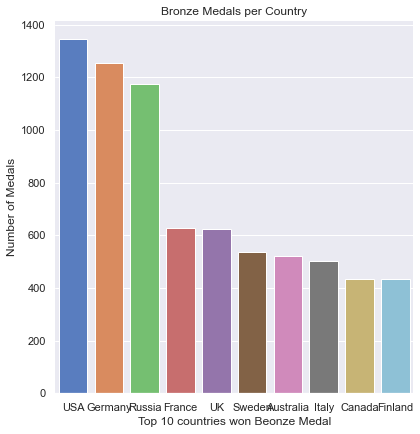

In [57]:
totalBronzeMedals = bronzeMedals.region.value_counts().reset_index(name='Medal').head(10)
g = sns.catplot(x="index", y="Medal", data=totalBronzeMedals,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_xlabels("Top 10 countries won Beonze Medal")
g.set_ylabels("Number of Medals")
plt.title('Bronze Medals per Country')

# Disciplines with the greatest number of Gold Medals For Specific Country

# Sports with Highest Gold Medals(USA).

In [58]:
goldMedalsUSA = goldMedals.loc[goldMedals['NOC'] == 'USA']

In [59]:
#Now, we can count the medals per discipline

In [60]:
goldMedalsUSA.Event.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,Basketball Men's Basketball,186
1,Swimming Men's 4 x 200 metres Freestyle Relay,111
2,Swimming Men's 4 x 100 metres Medley Relay,108
3,Rowing Men's Coxed Eights,107
4,Basketball Women's Basketball,95
5,Athletics Men's 4 x 400 metres Relay,81
6,Swimming Women's 4 x 100 metres Medley Relay,79
7,Swimming Women's 4 x 100 metres Freestyle Relay,78
8,Football Women's Football,66
9,Athletics Men's 4 x 100 metres Relay,63


# Sports with Highest Gold Medals(RUSSIA).

In [61]:
goldMedalsRUS = goldMedals.loc[goldMedals['NOC'] == 'RUS']

In [62]:
goldMedalsRUS.Event.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,Synchronized Swimming Women's Team,44
1,Rhythmic Gymnastics Women's Group,29
2,Handball Men's Handball,15
3,Handball Women's Handball,15
4,Cross Country Skiing Women's 4 x 5 kilometres ...,12
5,Volleyball Men's Volleyball,12
6,Synchronized Swimming Women's Duet,10
7,Figure Skating Mixed Team,10
8,Figure Skating Mixed Pairs,10
9,Biathlon Women's 4 x 6 kilometres Relay,8


# Sports with Highest Gold Medals(Germany).

In [63]:
goldMedalsGER = goldMedals.loc[goldMedals['NOC'] == 'GER']

In [64]:
goldMedalsGER.Event.value_counts().reset_index(name='Medal').head(10)

,index,Medal
0,Hockey Men's Hockey,49
1,"Equestrianism Mixed Dressage, Team",26
2,Rowing Men's Coxed Fours,25
3,Handball Men's Handball,22
4,Rowing Women's Quadruple Sculls,20
5,Bobsleigh Men's Four,20
6,Football Women's Football,18
7,Rowing Men's Coxed Eights,18
8,"Equestrianism Mixed Jumping, Team",17
9,"Canoeing Women's Kayak Fours, 500 metres",16


# Evolution of the Olympics over time

## How the proportion of Men/Women varied with time ?

In [65]:
MenOverTime = merged[(merged.Sex == 'M') & (merged.Season == 'Summer')]
WomenOverTime = merged[(merged.Sex == 'F') & (merged.Season == 'Summer')]

Text(0.5, 1.0, 'Variation of Male Athletes over time')

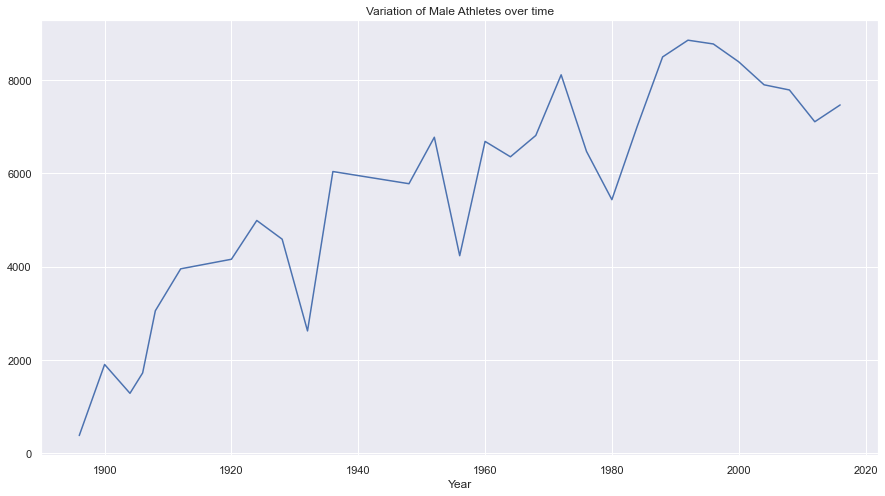

In [66]:
part = MenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(15, 8))
part.loc[:,'M'].plot()
plt.title('Variation of Male Athletes over time')

# How the proportion of Women varied with time ?

Text(0.5, 1.0, 'Variation of Female Athletes over time')

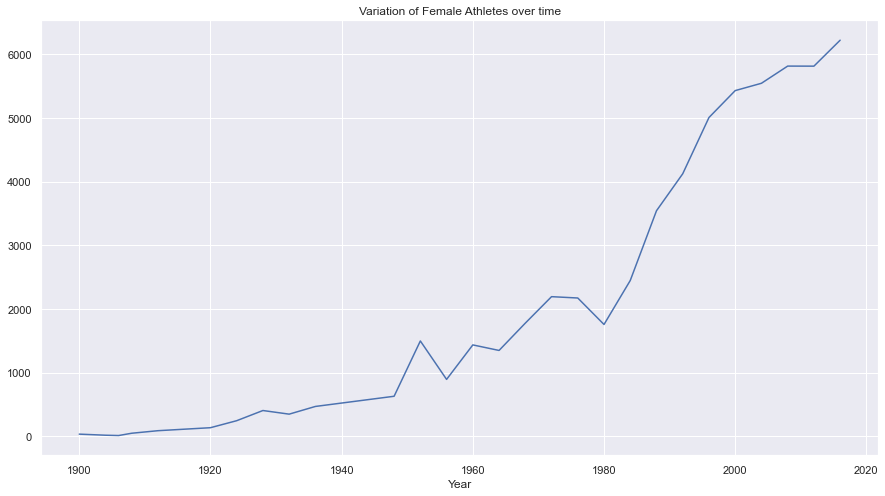

In [67]:
part = WomenOverTime.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(15, 8))
part.loc[:,'F'].plot()
plt.title('Variation of Female Athletes over time')

In [68]:
data = pd.read_csv('C:/Users/jaimi/Downloads/120years/athlete_events.csv')
regions = pd.read_csv('C:/Users/jaimi/Downloads/120years/noc_regions.csv')
events  = data.merge(regions[["NOC","region"]],left_on="NOC",right_on="NOC",how = "left")
host    = pd.read_csv(r"C:/Users/jaimi/Downloads/120years/host.csv",encoding='windows-1252')

# display ("EVENTS")
# display (events.head().style.set_properties(**{"background-color" : "black",
#                                                "color" : "lawngreen"}))

In [69]:
#Data Manipulation

#replace gender values
events["Sex"] = events["Sex"].map({"M":"MALE","F":"FEMALE"})

#replacing strings
events["region"] =events["region"].str.replace("Boliva","Bolivia")

#Grouping similar sports
def sport_category(events) :
    
    skating   = ['Speed Skating','Figure Skating','Short Track Speed Skating']
    skiing    = [ 'Cross Country Skiing', 'Alpine Skiing','Nordic Combined',
                 'Freestyle Skiing', 'Ski Jumping','Snowboarding', 'Alpinism']
    Bobsleigh = ['Bobsleigh','Skeleton']
    aquatics  =  ['Swimming','Synchronized Swimming','Diving','Water Polo']
    volley    =  ['Volleyball','Beach Volleyball']
    gymnastic =  ['Gymnastics','Rhythmic Gymnastics', 'Trampolining']
    
    for i in skating :
        if events["Sport"] == i :
            return "Skating"
        
    for i in skiing :
        if events["Sport"] == i :
            return "Skiing"
    
    for i in Bobsleigh :
        if events["Sport"] == i :
            return "Bobsleigh"
    
    for i in aquatics :
        if events["Sport"] == i :
            return "Aquatics"
    
    for i in volley :
        if events["Sport"] == i :
            return "Volley"
        
    for i in gymnastic :
        if events["Sport"] == i :
            return "Gymnastic"
    
    else : 
        return events["Sport"]

events["Sport_category"] = events.apply(lambda events : sport_category(events) ,axis = 1)



#Creating binary columns for medals\
def gold_m(events)  :
    if events["Medal"] == "Gold" :
        return 1 
    else :
        return 0
def silver_m(events)  :
    if events["Medal"] == "Silver" :
        return 1 
    else :
        return 0
def bronze_m(events)  :
    if events["Medal"] == "Bronze" :
        return 1 
    else :
        return 0
    
events["Gold"]   = events.apply(lambda events:gold_m(events),axis = 1) 
events["Silver"] = events.apply(lambda events:silver_m(events),axis = 1) 
events["Bronze"] = events.apply(lambda events:bronze_m(events),axis = 1) 
events["Total"] = events["Gold"] + events["Silver"] +events["Bronze"]

#splitting summer and winter olympics

summer = events[events["Season"] == "Summer"]
winter = events[events["Season"] == "Winter"]

#Host cities data manipulation

host["Year"] =  host["Year"].fillna(method= "ffill")
host["Year"] = host["Year"].astype(int)
host["Country"] = host["Country"].str.replace("\xa0","")
host["Country"] = host["Country"].str.replace("Nazi Germany","Germany")
host["Country"] = host["Country"].str.replace("West Germany","Germany")
host["Summer (Olympiad)"] = host["Summer (Olympiad)"].fillna("WINTER")
host["Winter"] = host["Winter"].fillna("SUMMER")


# ##3
def lab(host) :
    if host["Summer (Olympiad)"] == "WINTER" :
        return "WINTER"
    if host["Winter"] == "SUMMER" :
        return "SUMMER"
    
host["season"] = host.apply(lambda host:lab(host),axis = 1)
host = host[['City', 'Country',  'Year', 'latitude','longitude', 'season']]


host_s = host[host["season"] == "SUMMER"]
host_w = host[host["season"] == "WINTER"]

In [70]:
BLUE = '\033[94m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
BackgroundBlack = "\033[40m"
BackgroundBlue         = "\033[44m"
Magenta    = "\033[35m"
Green        = "\033[32m"
Yellow       = "\033[33m"
END = '\033[0m'

##summer 
print ("Summer Games")
print ("-------------")
print(Magenta+UNDERLINE+BOLD+"Games           : " , summer["Year"].nunique())
print("Host Countries  : ",  host[host["season"] == "SUMMER"]["Country"].nunique())
print("No of Sports    : ",  summer["Sport"].nunique())
print("No of Events    : ",  summer["Event"].nunique())
s_male_ev   = summer[summer["Sex"] == "MALE"]["Event"].unique().tolist()
s_female_ev = summer[summer["Sex"] == "FEMALE"]["Event"].unique().tolist()
s_both_ev   = [x for x in s_male_ev if x in s_female_ev]
s_male_events   = [x for x in s_male_ev if x not in s_both_ev]
s_female_events = [x for x in s_female_ev if x not in s_both_ev]
print("Events for female athletes : " , len(s_female_events))
print("Events for male athletes   : " , len(s_male_events))
print("Events for both genders    : " , len(s_both_ev))
print("Total NOC's     : ",  summer["NOC"].nunique())
print("Total Participant's  : ",  summer["ID"].nunique())
print("Female Participant's : ",  summer[summer["Sex"] == "FEMALE"]["ID"].nunique())
print("Male Participant's   : ",  summer[summer["Sex"] == "MALE"]["ID"].nunique())
print("Youngest Participant : ",summer.loc[summer["Age"].idxmin()]["Name"],
      " , Age - " , (summer.loc[summer["Age"].idxmin()]["Age"]).astype(int),
      " , Country - " ,summer.loc[summer["Age"].idxmin()]["region"] ,
      " , Year - " ,summer.loc[summer["Age"].idxmin()]["Year"])
print("Oldest Participant : ",summer.loc[summer["Age"].idxmax()]["Name"],
      " , Age - " , (summer.loc[summer["Age"].idxmax()]["Age"]).astype(int),
      " , Country - " ,summer.loc[summer["Age"].idxmax()]["region"] ,
      " , Year - " ,summer.loc[summer["Age"].idxmax()]["Year"])
s_med  = summer.groupby("Name")["Total"].sum().reset_index()
print("Most Medals (Athlete) : ", s_med.loc[s_med["Total"].idxmax()]["Name"])
s_med_c = summer.groupby("region")["Total"].sum().reset_index()
print("Most Medals (Country) : ",s_med_c.loc[s_med_c["Total"].idxmax()]["region"])

Summer Games
-------------
Games           :  29
Host Countries  :  19
No of Sports    :  52
No of Events    :  651
Events for female athletes :  160
Events for male athletes   :  437
Events for both genders    :  54
Total NOC's     :  230
Total Participant's  :  116776
Female Participant's :  28851
Male Participant's   :  87925
Youngest Participant :  Dimitrios Loundras  , Age -  10  , Country -  Greece  , Year -  1896
Oldest Participant :  John Quincy Adams Ward  , Age -  97  , Country -  USA  , Year -  1928
Most Medals (Athlete) :  Michael Fred Phelps, II
Most Medals (Country) :  USA


In [71]:
BLUE = '\033[94m'
BOLD = '\033[1m'
UNDERLINE = '\033[4m'
END = '\033[0m'
##winter
print ("Winter Games")
print ("-------------")
print(Magenta+UNDERLINE+BOLD+"Games           : " , winter["Year"].nunique())
print("Host Countries  : ",  host[host["season"] == "WINTER"]["Country"].nunique())
print("No of Sports    : ",  winter["Sport"].nunique())
print("No of Events    : ",  winter["Event"].nunique())

w_male_ev   = winter[winter["Sex"] == "MALE"]["Event"].unique().tolist()
w_female_ev = winter[winter["Sex"] == "FEMALE"]["Event"].unique().tolist()
w_both_ev   = [x for x in w_male_ev if x in w_female_ev]
w_male_events   = [x for x in w_male_ev if x not in w_both_ev]
w_female_events = [x for x in w_female_ev if x not in w_both_ev]
print("Events for female athletes : " , len(w_female_events))
print("Events for male athletes   : " , len(w_male_events))
print("Events for both genders    : " , len(w_both_ev))

print("Total NOC's     : ",  winter["NOC"].nunique())
print("Total Participant's  : ",  winter["ID"].nunique())
print("Female Participant's : ",  winter[winter["Sex"] == "FEMALE"]["ID"].nunique())
print("Male Participant's   : ",  winter[winter["Sex"] == "MALE"]["ID"].nunique())
print("Youngest Participant : ",winter.loc[winter["Age"].idxmin()]["Name"],
      " , Age - " , (winter.loc[winter["Age"].idxmin()]["Age"]).astype(int),
      " , Country - " ,winter.loc[winter["Age"].idxmin()]["region"] ,
      " , Year - " ,winter.loc[winter["Age"].idxmin()]["Year"])
print("Oldest Participant : ",winter.loc[winter["Age"].idxmax()]["Name"],
      " , Age - " , (winter.loc[winter["Age"].idxmax()]["Age"]).astype(int),
      " , Country - " ,winter.loc[winter["Age"].idxmax()]["region"] ,
      " , Year - " ,winter.loc[winter["Age"].idxmax()]["Year"])
w_med  = winter.groupby("Name")["Total"].sum().reset_index()
print("Most Medals (Athlete) : ", w_med.loc[w_med["Total"].idxmax()]["Name"])
w_med_c = winter.groupby("region")["Total"].sum().reset_index()
print("Most Medals (Country) : ",w_med_c.loc[w_med_c["Total"].idxmax()]["region"])

Winter Games
-------------
Games           :  22
Host Countries  :  12
No of Sports    :  17
No of Events    :  119
Events for female athletes :  52
Events for male athletes   :  62
Events for both genders    :  5
Total NOC's     :  119
Total Participant's  :  18958
Female Participant's :  5166
Male Participant's   :  13792
Youngest Participant :  Magdalena Cecilia Colledge  , Age -  11  , Country -  UK  , Year -  1932
Oldest Participant :  Carl August Verner Kronlund  , Age -  58  , Country -  Sweden  , Year -  1924
Most Medals (Athlete) :  Ole Einar Bjrndalen
Most Medals (Country) :  Russia


#  Athlete participation
## Q. How does the athelete participation increased every olympic year?

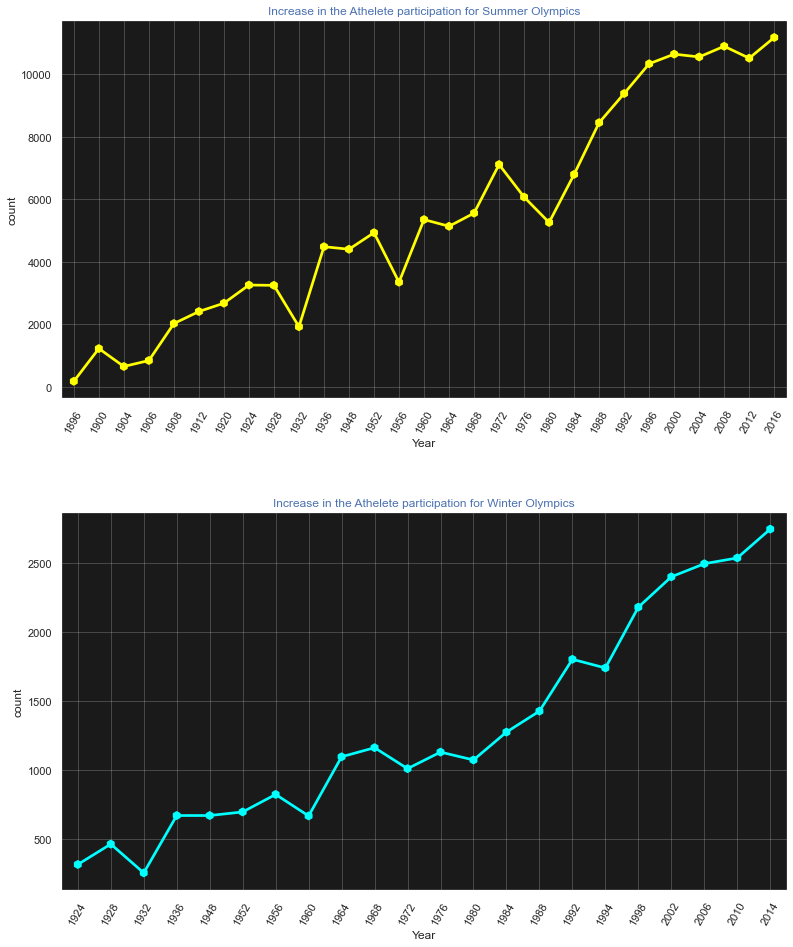

In [72]:
sum_c = summer.groupby(["Year"])["ID"].nunique().reset_index()
win_c = winter.groupby(["Year"])["ID"].nunique().reset_index()

fig = plt.figure(figsize=(13,16))
plt.subplot(211)
ax = sns.pointplot(x = sum_c["Year"] , y = sum_c["ID"],
                   color="Yellow",markers="h")
plt.xticks(rotation = 60)
ax.set_facecolor("k")
plt.grid(True,alpha=.2)
plt.ylabel("count")
plt.title("Increase in the Athelete participation for Summer Olympics",color="b")

plt.subplot(212)
ax1 = sns.pointplot(x = win_c["Year"] , y = win_c["ID"],
                    color = "Cyan",markers="h")
plt.xticks(rotation = 60)
ax1.set_facecolor("k")
plt.grid(True,alpha=.2)
plt.ylabel("count")
plt.title("Increase in the Athelete participation for Winter Olympics",color="b")
plt.subplots_adjust(hspace = .3)
plt.show()

# Gender Distribution

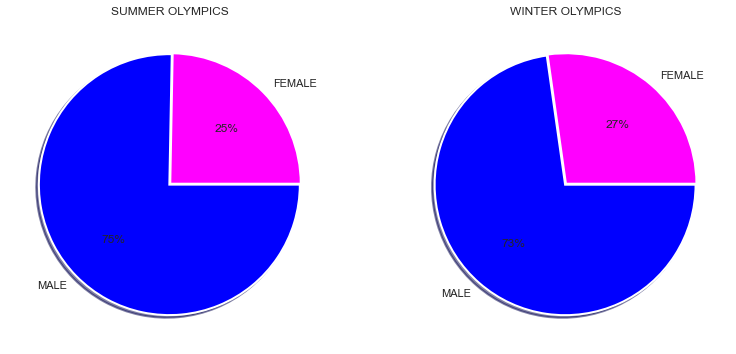

In [73]:
plt.figure(figsize=(13,6))
plt.subplot(121)
summer.groupby("Sex")["ID"].nunique().plot.pie(autopct = "%1.0f%%",
                                               wedgeprops = {"linewidth":2,"edgecolor":"w"},
                                              explode = [0,.01],shadow = True , 
                                               colors = ["magenta","blue"]) 
plt.ylabel("")
circ = plt.Circle((0,0),.0,color = "white")
plt.gca().add_artist(circ)
plt.title("SUMMER OLYMPICS")

plt.subplot(122)
winter.groupby("Sex")["ID"].nunique().plot.pie(autopct = "%1.0f%%",
                                               wedgeprops = {"linewidth":2,"edgecolor":"w"},
                                              explode = [0,.01],shadow = True , 
                                               colors = ["magenta","blue"]) 
plt.ylabel("")
circ = plt.Circle((0,0),.0,color = "white")
plt.gca().add_artist(circ)
plt.title("WINTER OLYMPICS")

plt.show()

# Number of Countries participated every year.

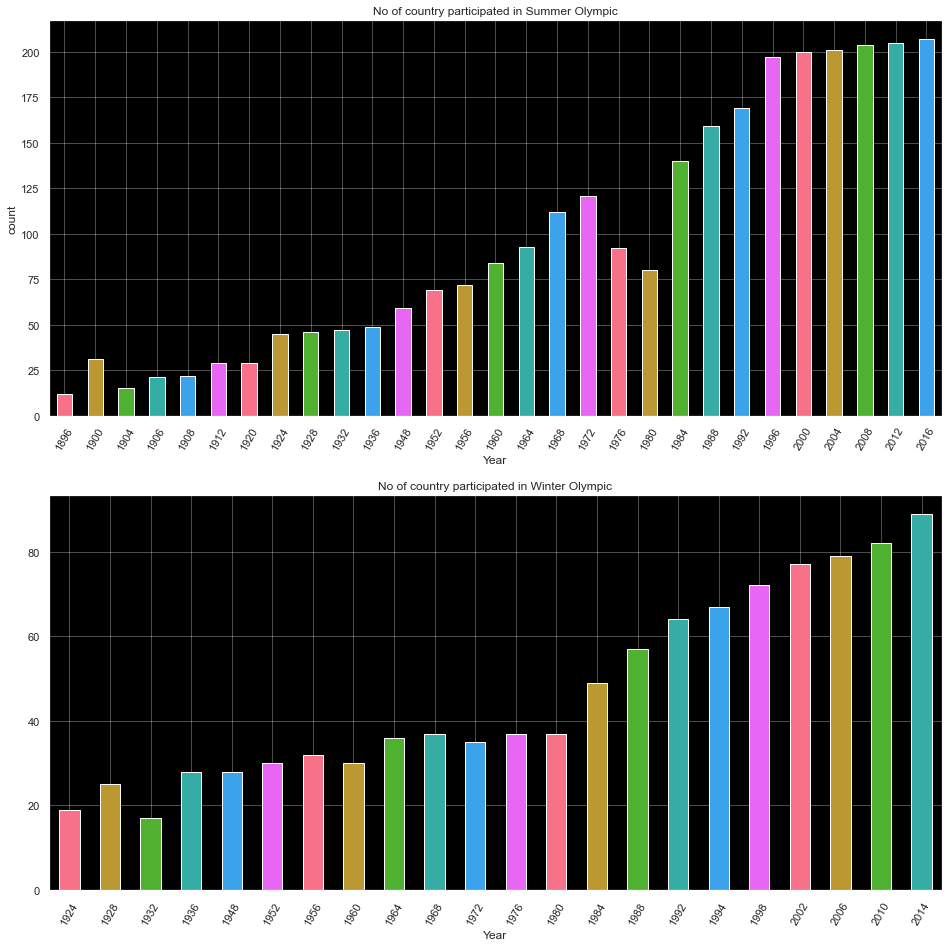

In [74]:
plt.figure(figsize=(16,16))
plt.subplot(211)
ax = summer.groupby("Year")["NOC"].nunique().plot(kind = "bar",
                                                 color = sns.color_palette("husl"),
                                                 linewidth = 1,
                                                  edgecolor=  "w"*summer["Year"].nunique())
plt.xticks(rotation = 60)
ax.set_facecolor("black")
plt.ylabel("count")
plt.title("No of country participated in Summer Olympic")
plt.grid(True,alpha=.3)

plt.subplot(212)
ax1 = winter.groupby("Year")["NOC"].nunique().plot(kind = "bar",
                                                 color = sns.color_palette("husl"),
                                                 linewidth = 1,
                                                   edgecolor=  "w"*summer["Year"].nunique())
plt.xticks(rotation = 60)
ax1.set_facecolor("black")
plt.title("No of country participated in Winter Olympic")
plt.grid(True,alpha=.3)
plt.show()

# Q. Which country hosted the Olympic and in which year?

# Countries hosted summer olympic.

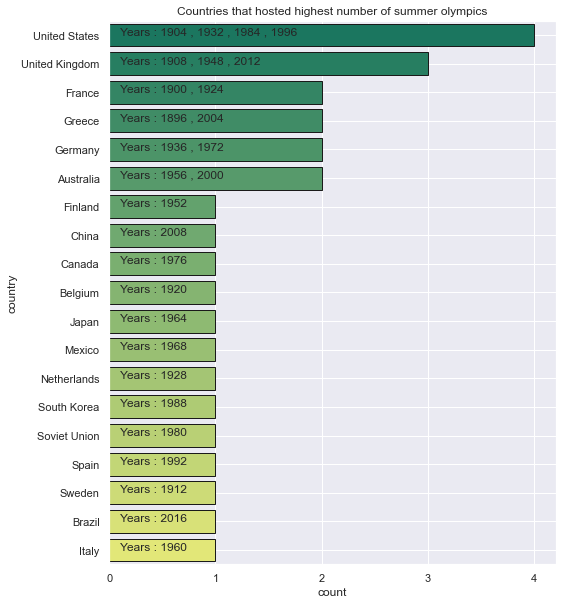

In [75]:
sns.set_style("darkgrid")
host_s["Year"] = host_s["Year"].astype(str)
hs = host_s.groupby("Country")["Year"].apply(" , ".join).reset_index()
hs1 = host_s["Country"].value_counts().reset_index()
h_s = hs.merge(hs1,left_on = "Country",right_on = "index",how = "left")
h_s = h_s.sort_values(by = "Country_y",ascending=False)

plt.figure(figsize=(8,10))
ax = sns.barplot("Country_y","Country_x",
                 data=h_s ,linewidth = 1,
                 palette = "summer",
                 edgecolor = "k"*h_s["Country_x"].nunique())
for i,j in enumerate("Years : " + h_s["Year"]) :
    ax.text(.1,i,j,fontsize = 12)
plt.grid(True)
plt.xticks(np.arange(0,5,1))
plt.xlabel("count")
plt.ylabel("country")
plt.title("Countries that hosted highest number of summer olympics")
plt.show()

# Countries hosted Winter olympic


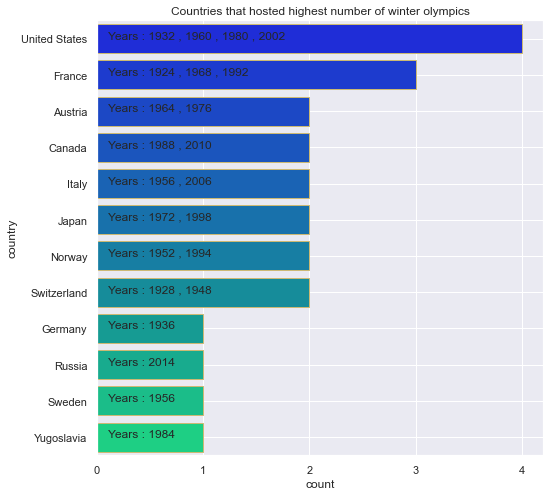

In [76]:
host_w["Year"] = host_w["Year"].astype(str)
hw = host_w.groupby("Country")["Year"].apply(" , ".join).reset_index()
hw1 = host_w["Country"].value_counts().reset_index()
h_w = hw.merge(hw1,left_on = "Country",right_on = "index",how = "left")
h_w = h_w.sort_values(by = "Country_y",ascending=False)

plt.figure(figsize=(8,8))
ax = sns.barplot("Country_y","Country_x",
                 data=h_w ,linewidth = 1,
                 palette = "winter",
                 edgecolor = "y"*h_w["Country_x"].nunique())
for i,j in enumerate("Years : " + h_w["Year"]) :
    ax.text(.1,i,j,fontsize = 12)
plt.grid(True)
plt.xticks(np.arange(0,5,1))
plt.xlabel("count")
plt.ylabel("country")
plt.title("Countries that hosted highest number of winter olympics")
plt.show()

# Number of Sports Increasing every olympic year

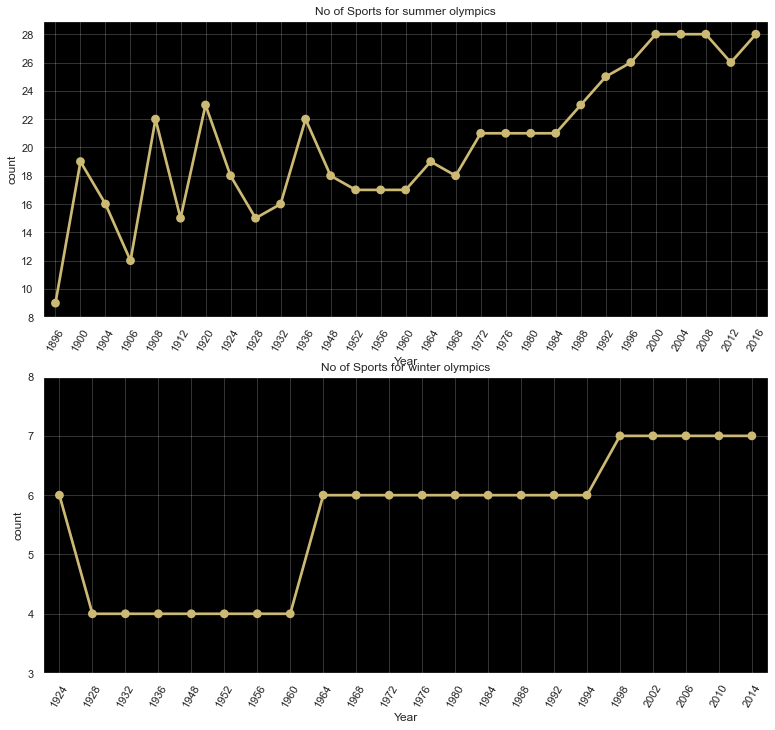

In [77]:
sp_s = summer.groupby("Year")["Sport_category"].nunique().reset_index()
sp_w = winter.groupby("Year")["Sport_category"].nunique().reset_index()

plt.figure(figsize=(13,12))

plt.subplot(211)
ax = sns.pointplot(sp_s["Year"],sp_s["Sport_category"],color = "y")
ax.set_facecolor("black")
plt.xticks(rotation = 60)
plt.grid(True,alpha= .2)
plt.title("No of Sports for summer olympics")
plt.yticks(np.arange(8,30,2))
plt.ylabel("count")

plt.subplot(212)
ax = sns.pointplot(sp_w["Year"],sp_w["Sport_category"],color = "y")
ax.set_facecolor("black")
plt.xticks(rotation = 60)
plt.grid(True,alpha= .2)
plt.title("No of Sports for winter olympics")
plt.yticks(np.arange(3,9,1))
plt.ylabel("count")

plt.show()